<a href="https://colab.research.google.com/github/alexisperrier/emines_ts/blob/master/AR(1)_stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse / Etude processus AR(1)



# AR(p)

$x_{t} = a_{1}.x_{t-1} + a_{2}.x_{t-2} + \cdots +  a_{p}.x_{t-p} + \epsilon_t $


$x_{t} = \sum_{k=1}^p a_{k}  . x_{t-k} + \epsilon_t $





# processus simple AR(1)

$x_{t+1} = \rho . x_t + \epsilon_t $


$\epsilon_t$ white noise gaussien

$x_0 = 0$


In [83]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import statsmodels.tsa.api as smt

def plotProcess(n_samples=1000, rho=0):
    # genere le white noise
    # et une premier version du processus x
    x = w = np.random.normal(size=n_samples)
    # genere le processus AR(1)
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]
    plt.figure(figsize=(10, 3))
    plt.plot(x)
    plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(adfuller(x)[1], 5)))
    plt.figure(figsize=(6, 6))
    smt.graphics.plot_acf(x, lags=None)

    plt.figure(figsize=(6, 6))
    smt.graphics.plot_pacf(x, lags=None)


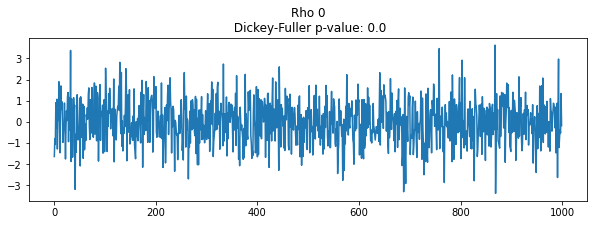

<Figure size 432x432 with 0 Axes>

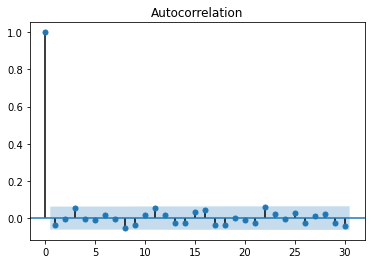

<Figure size 432x432 with 0 Axes>

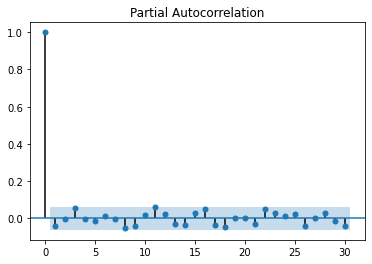

In [84]:
plotProcess(n_samples=1000, rho=0)

$x_{t+1} = 0.2 . x_t + \epsilon_t $

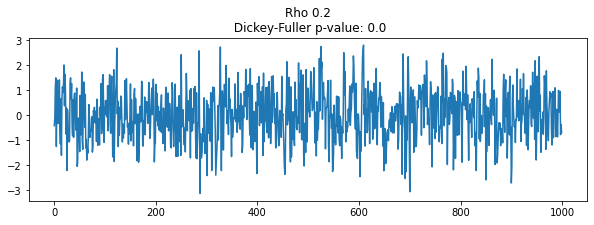

<Figure size 432x432 with 0 Axes>

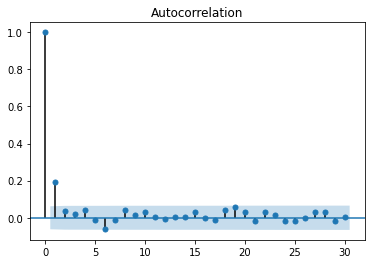

<Figure size 432x432 with 0 Axes>

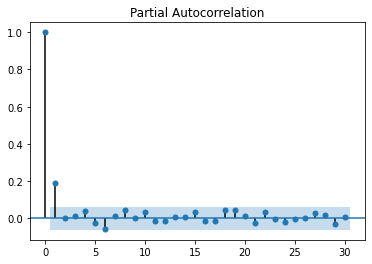

In [85]:
plotProcess(n_samples=1000, rho=0.2)

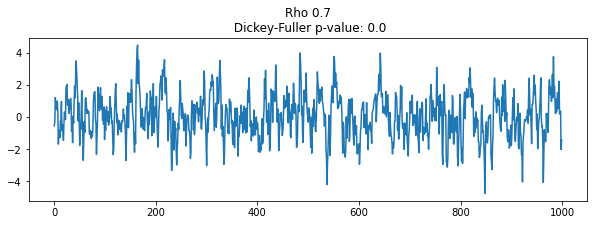

<Figure size 432x432 with 0 Axes>

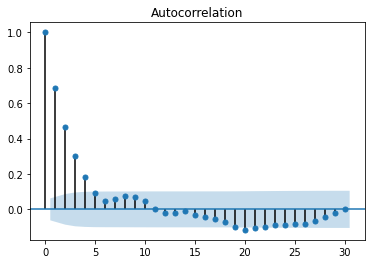

<Figure size 432x432 with 0 Axes>

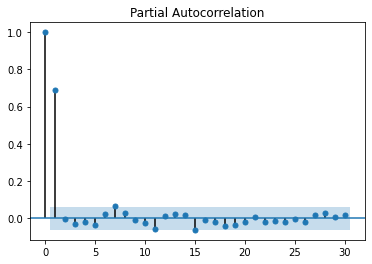

In [86]:
plotProcess(n_samples=1000, rho=0.7)

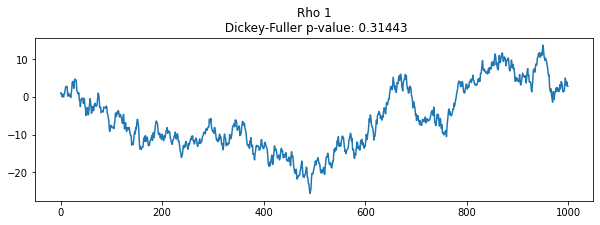

<Figure size 432x432 with 0 Axes>

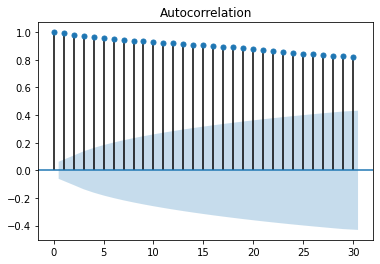

<Figure size 432x432 with 0 Axes>

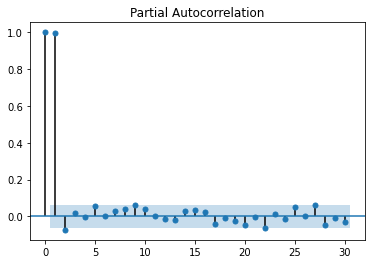

In [87]:
plotProcess(n_samples=1000, rho=1)

# modeliser un signal par un AR(p)


comment trouver p?


calcule le partial autocorrelation

trouve le nombre de pics 

= p 





$x_t = a. x_{t-1} + b.x_{t-2} + \epsilon_t  $

In [88]:

def plotProcess(n_samples=1000, a=0, b = 0):
    # genere le white noise
    # et une premier version du processus x
    x = w = np.random.normal(size=n_samples)
    # genere le processus AR(2)
    for t in range(1,n_samples):
        x[t] = a * x[t-1] + b * x[t-2]  + w[t]
    plt.figure(figsize=(10, 3))
    plt.plot(x)
    plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(adfuller(x)[1], 5)))
    plt.figure(figsize=(6, 6))
    smt.graphics.plot_acf(x, lags=None)

    plt.figure(figsize=(6, 6))
    smt.graphics.plot_pacf(x, lags=None)


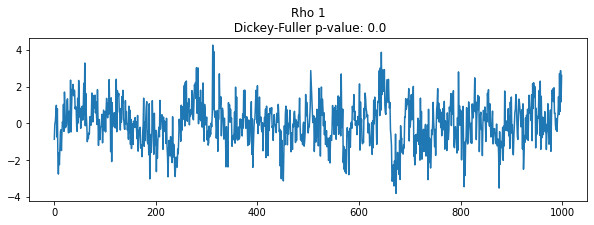

<Figure size 432x432 with 0 Axes>

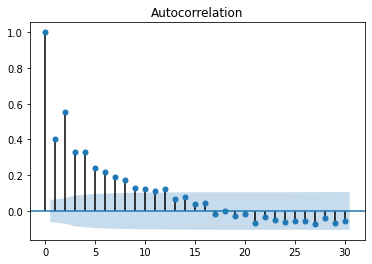

<Figure size 432x432 with 0 Axes>

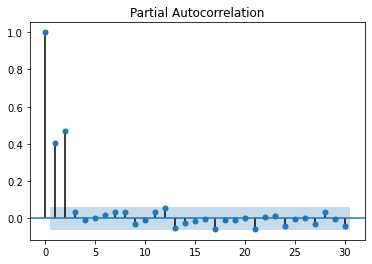

In [89]:
plotProcess(n_samples=1000, a=0.2, b = 0.5)

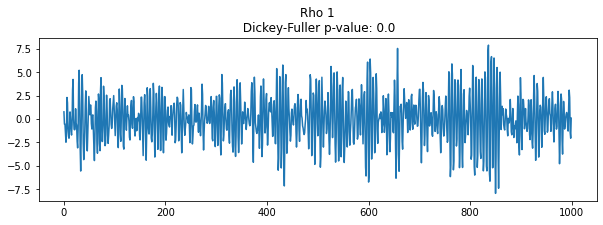

<Figure size 432x432 with 0 Axes>

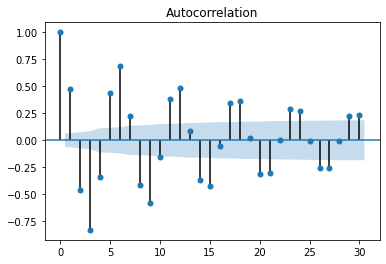

<Figure size 432x432 with 0 Axes>

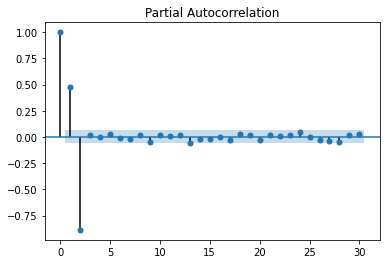

In [90]:
plotProcess(n_samples=1000, a=0.9, b = -0.9)

$ x_t  = a . x_{t-1} + \epsilon_t $


$ x_t  = a . (a . x_{t-2} + \epsilon_{t-1} ) + \epsilon_t  = a^2 x_{t-2} + a \epsilon_{t-1}  +  \epsilon_t $ 

$x_t = \sum_{k=0}^t  a^k \epsilon_{t-k}  $

$ cov(x_{t} x_{t-2}) = a \times ... + a^2 \times ...   $

a << 1

a^2 << 1


a < 1 proche

a^2 proche de 1 


In [91]:
for rho in [0, 0.3,0.6,0.9, 1]:
    
    plotProcess(n_samples=1000, rho=rho)

TypeError: ignored

# Random Walk - Marche Aléatoire 

$x_{t+1} = x_t + \epsilon_t  = (x_{t-1} + \epsilon_{t-1}) + \epsilon_{t}   = \cdots $


$x_{t} = \sum_{k=0}^{t-1}  \epsilon_k $

## Esperance

$Ex_{t} = \sum_{k=0}^{t-1}  E(\epsilon_k) = 0 $

## Var







# Marche aleatoire - binomiale



In [ ]:
from random import seed
from random import random

from pandas.plotting import autocorrelation_plot
def rw(s):
    # avec ou sans drift
    alpha = 0
    seed(s)
    random_walk = [0]

    for i in range(1, 1000):
        movement = -1 if random() < 0.5 else 1
        value = alpha + random_walk[i-1] + movement
        random_walk.append(value)
    ax, f = plt.subplots(1,1)
    plt.plot(random_walk)
    plt.grid()
    return random_walk


In [ ]:

x = rw(1)
ax, f = plt.subplots(1,1)
autocorrelation_plot(x)



In [ ]:
rw(2)
ax, f = plt.subplots(1,1)
autocorrelation_plot(x)


In [ ]:
rw(888)

ax, f = plt.subplots(1,1)
autocorrelation_plot(x)


In [ ]:
rw(6)

# AR(n) - Yule Walker




In [98]:
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA

from statsmodels.regression.linear_model import yule_walker


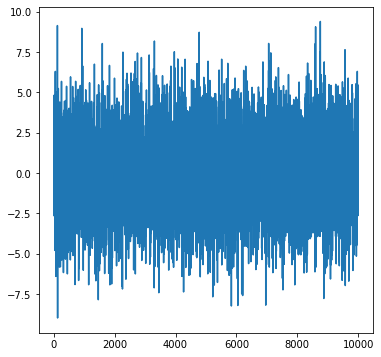

In [110]:
ar_param = [1, 0.1,-0.2]
ma_param = [1, 0.5, 2]
x = arma_generate_sample(ar_param, ma_param, 10000)

plt.figure(figsize=(6, 6))
plt.plot(x)


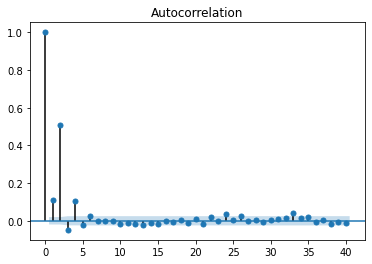

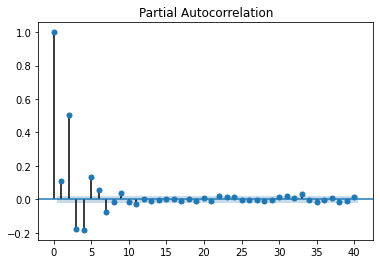

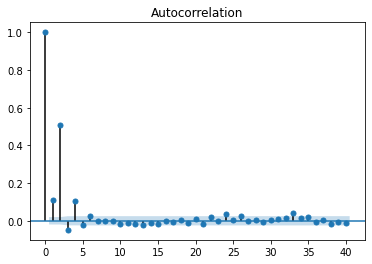

In [112]:

smt.graphics.plot_pacf(x, lags=None)
smt.graphics.plot_acf(x, lags=None)

In [115]:
model = ARMA(x, (2, 2)).fit(trend='nc', disp=0)
print(model.params)
print("ar param",[ -a for a in ar_param])
print("ma param",[ a for a in ma_param])

[-0.13325221  0.18930191  0.26510604  0.49817699]
ar param [-1, -0.1, 0.2]
ma param [1, 0.5, 2]
